Local Peclet number is: 15.625
error_L2  = 0.2818307037886126


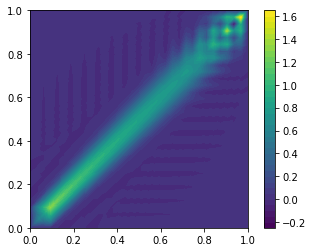

Local Peclet number is: 15.625
error_L2  = 0.10803121570871516


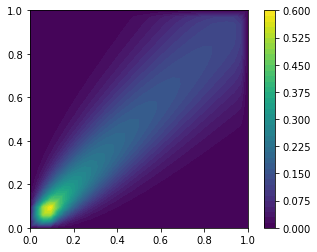

In [26]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
for i in range(2):
    case = '_usual'
    N = 32
    mu = 0.001
    c1 = 1/np.sqrt(2)
    b = Constant([c1,c1])
    r = Constant(0)
    f = Expression('x[0]< 0.1 && x[1] < 0.1 ? 10 : 0', degree=2)
    frm = np.sqrt(1/2 + 1/2)
    pe = frm*1/(N * 2 * mu)
    print('Local Peclet number is:', pe)
    sigma = 1/(frm*2 * N)*(1/np.tanh(pe) -1/pe)
    if i == 1:
        case = "_supg"
        mu = max(mu, sigma)
    #print(sigma)
    # Create mesh and define function space
    mesh = UnitSquareMesh(N, N)
    V = FunctionSpace(mesh, "P", 1)

    # Define boundary condition
    import sympy as sym
    
    u_D = Constant(0)
    mu = Constant(mu)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V, u_D, boundary)
    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)

    a = mu * dot(grad(u), grad(v))*dx + r*u*v*dx + dot(b,grad(u))*v*dx
    L = f*v*dx
    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)
    plt.show()
    # Plot solution and mesh
    c = plot(u)
    plt.colorbar(c)
    #plot(mesh)
    # Save solution to file in VTK format
    vtkfile = File('adr_r/solution_comp'+case+'.pvd')
    vtkfile << u
    

    # Compute error in L2 norm
    error_L2 = errornorm(u_D, u, 'L2', degree_rise = 4)

    print('error_L2  =', error_L2)

    # Hold plot
    plt.show()
